# Transesterification

### Transesterification reactor based on USDA biodiesel model. Purchase price based on Apostolakou et. al. "Techno-economic analysis of a biodiesel production process from vegetable oils". Fuel Processing Technology (2009) 

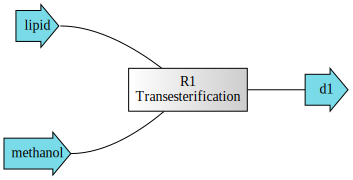

Transesterification: R1
ins...
[0] lipid
    phase: 'l', T: 25 degC, P: 1 atm
    flow: Lipid  1
          net    10 kmol/hr 
[1] methanol
    phase: 'l', T: 25 degC, P: 1 atm
    flow: Methanol  0.89
          NaOCH3    0.11
          net       60 kmol/hr 
outs...
[0] d1
    phase: 'l', T: 60 degC, P: 1 atm
    flow: Lipid      0.0106
          Methanol   0.539
          Glycerol   0.0951
          Biodiesel  0.285
          NaOH       0.0698
          net        94.6 kmol/hr 

results...
{'Operation': {},
 'Design':
   {'Volume': 16.7 (m^3)},
 'Cost':
   {'Reactor Cost': 7.05e+04 (USD)}}

heat utilities...
HeatUtility: Cooling Water at T=305 K
 Duty:-3.29e+06 kJ/hr
 Flow: 4.05e+04 kg/hr
 Cost: 9.62e+03 USD/year


In [1]:
from biosteam import Stream, Units
from Biodiesel_species import biodiesel_species

# Set up stream
Stream.species = biodiesel_species
lipid = Stream('lipid', flow=10, species='Lipid')
methanol = Stream('methanol')

# Set up reactor
R1 = Units.Transesterification('R1', efficiency=0.90, r=6, T=273.15+60, catalyst_molfrac=0.11)
R1.ins =(lipid, methanol)

# Run all methods
R1.run()
R1.operation()
R1.design()
R1.cost()

# See all results
R1.diagram
R1.show(T='degC', P='atm', in_fractions= True)
print('\nresults...\n' + str(R1.results))
print('\nheat utilities...')
for hu in R1.heat_utilities:
    hu.show(Cost='USD/year')